#Web Scraping

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
#set url
url='https://stockanalysis.com/stocks/sbux/revenue/'

In [3]:
#make a request to the server on which the website is hosted on
page=requests.get(url)

In [4]:
#prepare empty lists to store scraped data
scraped_year=[]
scraped_revenue=[]
scraped_revenue_change=[]
scraped_revenue_growth=[]


#check statuse code
if page.status_code==200:

  #import the raw html into BeautifulSoup
  soup=BeautifulSoup(page.content,'html.parser')

  #locating table on the page with tag 'table'
  starbucks_table=soup.find('table')

  #find all rows of table
  for row in starbucks_table.tbody.find_all('tr'):

    #find all td tags
    columns=row.find_all('td')

    #slicing only the year value and convert to integer
    year=int(columns[0].text.strip(',')[-4:])

    #get rid of unit and convert to float
    revenue=float(columns[1].text.strip('B,M'))

    #get rid of unit and convert to float
    revenue_change=columns[2].text.strip('B')

    #convert million into billion
    if 'M' in revenue_change:
      revenue_change=float(revenue_change.replace('M',''))/1000


    #convert to float
    revenue_growth=columns[3].text
    new_revenue_growth=revenue_growth.strip('%')

    #append the converted data into each list
    scraped_year.append(year)
    scraped_revenue.append(revenue)
    scraped_revenue_change.append(revenue_change)
    scraped_revenue_growth.append(new_revenue_growth)
else:
  print('The URL is not found')


In [5]:
#building dataframe
starbucks_data={'Year':scraped_year,
          'Annual Revenue(in Billion)':scraped_revenue,
          'Change of Revenue':scraped_revenue_change,
          'Revenue Growth Rate(%)':scraped_revenue_growth}

df=pd.DataFrame(starbucks_data)

In [6]:
#only focus on years after 1999
unnecessary_rows=[24,25,26,27,28,29]

#drop unnecessary rows
starbucks_df=df.drop(unnecessary_rows)

#sort years from oldest to most recent
starbucks_df.sort_values(by='Year',ascending=True,inplace=True)

In [7]:
starbucks_df

,Year,Annual Revenue(in Billion),Change of Revenue,Revenue Growth Rate(%)
23,2000,2.18,0.49079,29.10
22,2001,2.65,0.47137,21.65
21,2002,3.29,0.63993,24.16
20,2003,4.08,0.78661,23.92
19,2004,5.29,1.22,29.90
18,2005,6.37,1.08,20.31
17,2006,7.79,1.42,22.26
16,2007,9.41,1.62,20.86
15,2008,10.38,0.9715,10.32
14,2009,9.77,-0.6084,-5.86


In [8]:
#save csv file
starbucks_df.to_csv('Starbucks.csv',index='False')

#Loading Dataframe

In [9]:
#read csv file
starbucks=pd.read_csv('Starbucks.csv',index_col=[0])

In [10]:
#taking a peek at the dataset
starbucks.head()

,Year,Annual Revenue(in Billion),Change of Revenue,Revenue Growth Rate(%)
23,2000,2.18,0.49079,29.10
22,2001,2.65,0.47137,21.65
21,2002,3.29,0.63993,24.16
20,2003,4.08,0.78661,23.92
19,2004,5.29,1.22000,29.90


In [11]:
#see dataframe shape
starbucks.shape

(24, 4)

In [12]:
#checking dataframe information
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 23 to 0
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        24 non-null     int64  
 1   Annual Revenue(in Billion)  24 non-null     float64
 2   Change of Revenue           24 non-null     float64
 3   Revenue Growth Rate(%)      24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 960.0 bytes


In [13]:
#checking null
starbucks.isnull().sum()

Year                          0
Annual Revenue(in Billion)    0
Change of Revenue             0
Revenue Growth Rate(%)        0
dtype: int64

#Visualizations

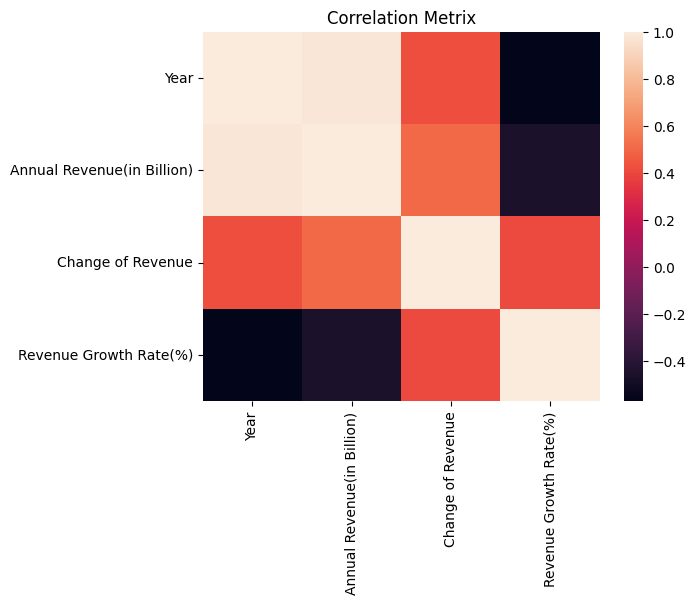

In [14]:
#correlation matrix
sns.heatmap(starbucks.corr())
plt.title('Correlation Metrix')
plt.show()

Visualizing the revenue over years

<Axes: title={'center': 'Revenue Over Years'}, xlabel='Year'>

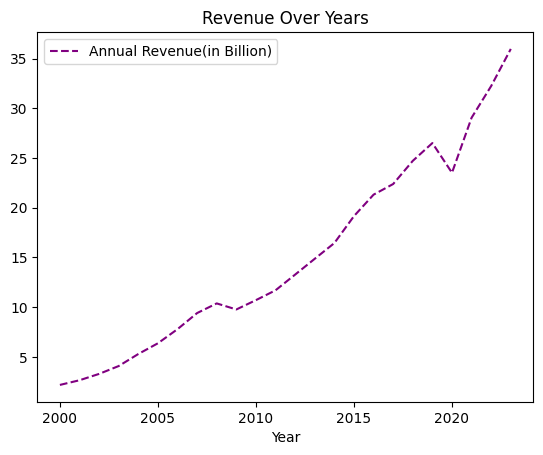

In [15]:
#lineplot
starbucks.plot(title='Revenue Over Years',x='Year',y='Annual Revenue(in Billion)',color='purple',style='--')

Text(0.5, 1.0, 'Annual Revenue Over Years')

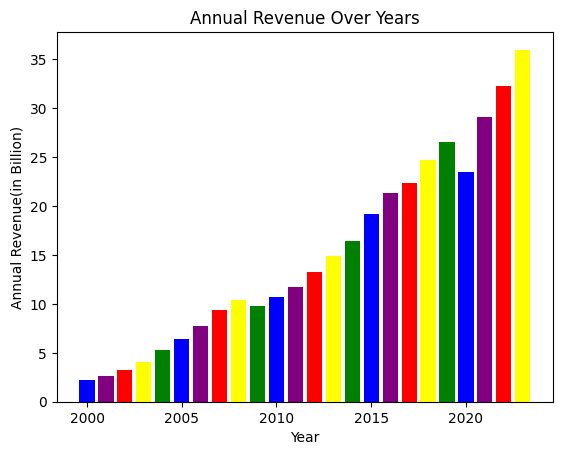

In [16]:
#barplot
x=starbucks['Year']
y=starbucks['Annual Revenue(in Billion)']

#change bar color
color=['blue','purple','red','yellow','green']
plt.bar(x,y,color=color)

#set x label
plt.xlabel('Year')

#set y label
plt.ylabel('Annual Revenue(in Billion)')

#set title
plt.title('Annual Revenue Over Years')

Visualizing the growth of revenue over years

Text(0.5, 1.0, 'Year vs Growth(%)')

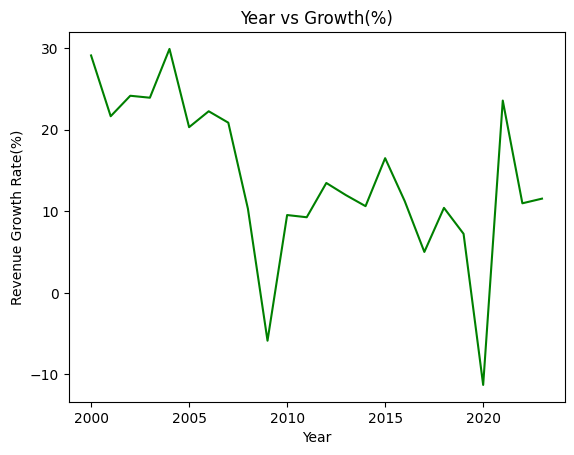

In [17]:
sns.lineplot(data=starbucks,x="Year", y="Revenue Growth Rate(%)",color='g')
plt.title('Year vs Growth(%)')

#Regression

In [18]:
#Removing the revenue column since we have assigned it to 'y'
X=starbucks.drop(['Annual Revenue(in Billion)'],axis=1)

In [19]:
#Assigning the revenue column (targets) to 'y'
y=starbucks['Annual Revenue(in Billion)'].values

In [20]:
#Splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [21]:
#Creating the model and fitting on the training data
from sklearn.linear_model import LinearRegression

#Loading the linear regression model
LR=LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [22]:
#Making prediction on the test data
y_pred=LR.predict(X_test)

In [23]:
#Calculating the coefficients
coefficients=LR.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [ 1.69720955 -0.42351259  0.31684155]


In [24]:
#Calculating the intercept
intercept=LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -3402.6923228589617


In [25]:
#Calculating R Squared
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f'R^2: {r2}')

R^2: 0.9370073997998739


In [26]:
#Caculating Mean Square Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')

MSE: 5.838112847653802


In [27]:
#Calculating Root Mean Squared Error
rmse=mean_squared_error(y_test,y_pred,squared=False)
print(f'RMSE: {rmse}')

RMSE: 2.416218708572095


In [28]:
#Calculating Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 2.029495981534831


In [29]:
y_pred

array([25.50961114, 31.19330956, 15.69200474, 32.48988051,  5.40264392,
        8.16282306,  4.06412358, 18.18659386])

#Export the model as pickle

In [30]:
import pickle

with open('Starbucks_revenue_prediction_model.pkl','wb')as f:
  pickle.dump(LR,f)